In [2]:
#Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)

In [4]:
#create dataframe and store dataset there
# pd to read data
data = pd.read_csv(r'C:\Users\GKamau\Downloads\water_quality_.csv')

In [6]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0


In [7]:
#information about data (missing values and data type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3114 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [10]:
#column data types
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Check                int64
dtype: object

In [8]:
#find missing values in all columns - missing value analysis
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Check                0
dtype: int64

In [11]:
#fish out the missing values
data = data.dropna()


In [12]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64

In [13]:
#descriptive statistics to summarize the central tendency, dispersion and shape of a dataset’s distribution
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,27.006707,124.000000,6.494749,1.000000


In [14]:
#unique value analysis - how many different values e.g(there's 2 entries for check[1 & 0]
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]
pd.DataFrame(dict, index = ["unique count"]).transpose()

,unique count
ph,2011
Hardness,2011
Solids,2011
Chloramines,2011
Sulfate,2011
Organic_carbon,2011
Trihalomethanes,2011
Turbidity,2011
Check,2


In [15]:
import os

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

In [17]:
!pip install warnings

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [18]:
import warnings

In [19]:
warnings.filterwarnings("ignore")

In [20]:
#column analysis - categorical & numerical variables
def grab_col_names(dataframe, cat_th=10):
    #cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes =="0"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
    			dataframe[col].dtypes != "0"]
    cat_cols = cat_cols + num_but_cat
   #num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes !="0"]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Number of Categorical Variables: {len(cat_cols)}")
    print(f"Number of Numerical Variables: {len(num_cols)}")
        
    return cat_cols, num_cols

In [21]:
cat_cols, num_cols = grab_col_names(data)

Variables: 9
Number of Categorical Variables: 1
Number of Numerical Variables: 8


In [22]:
categorical = print(cat_cols)
Numerical =print(num_cols)

['Check']
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [25]:
#Numeric feature analysis
#add output (target variable) to the numeric column list
num_cols.append("output")
num_cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'output']

In [26]:
#Categorical(cant be counted) Feature analysis
cat_cols

['Check']

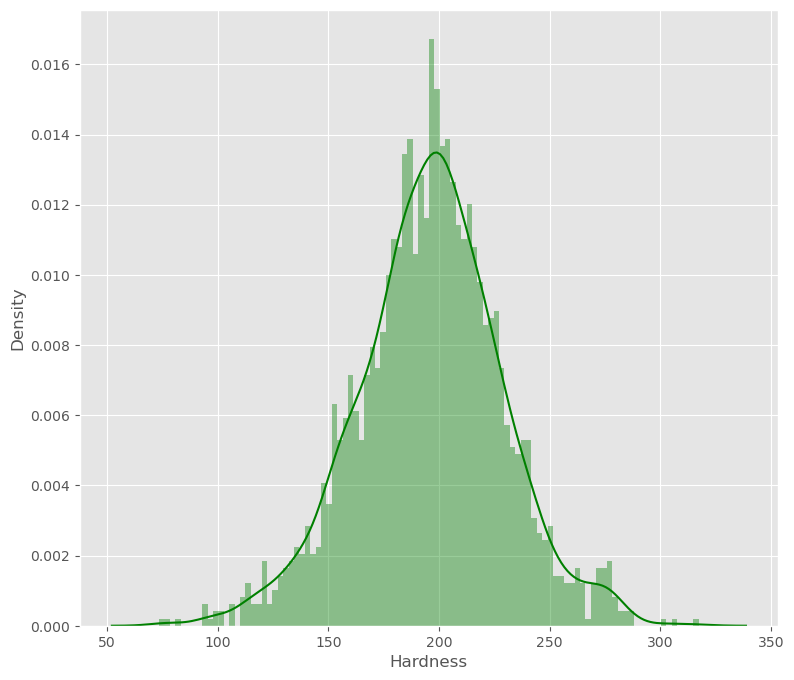

In [31]:
plt.figure(figsize=(9, 8))
sns.distplot(data['Hardness'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [38]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,12.363817,62.798309,4.401425,0


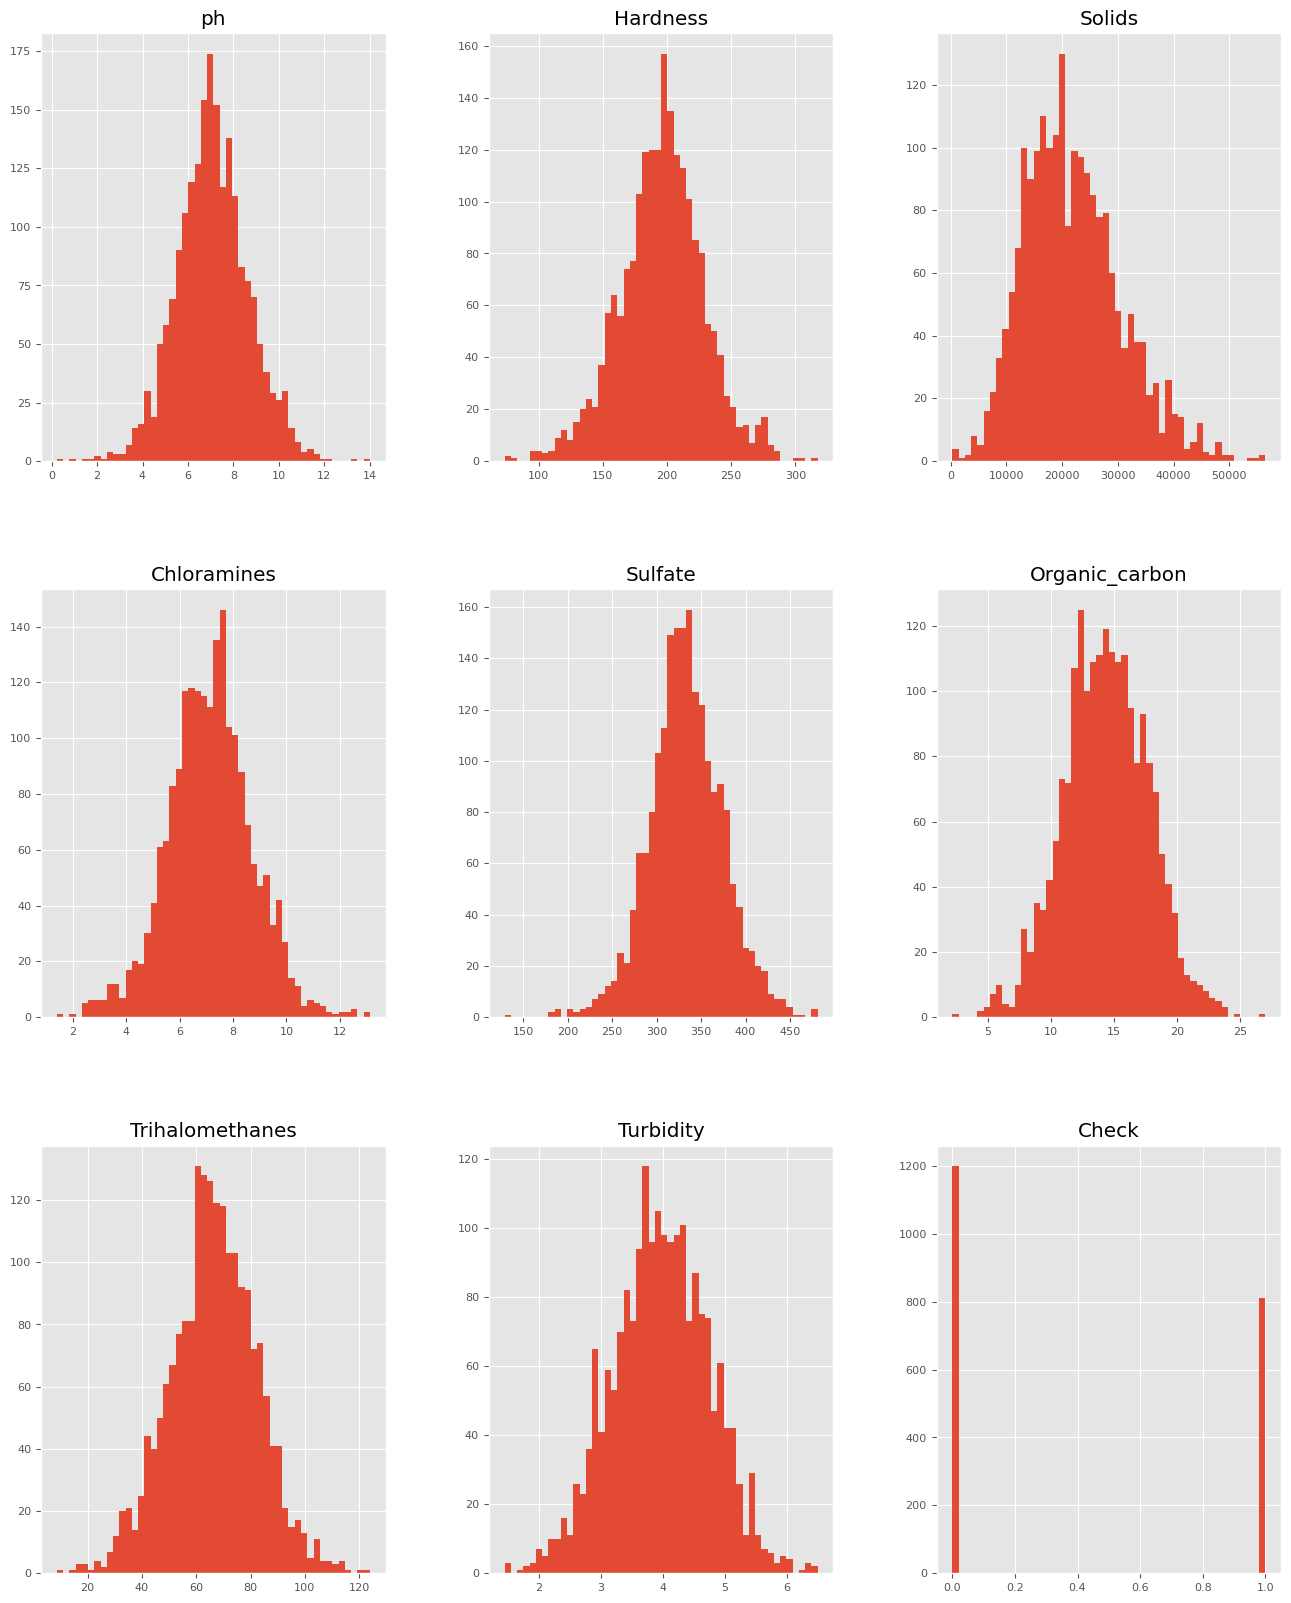

In [39]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [40]:
#correlation of data using spearman method
data.corr(method = 'spearman')

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
ph,1.000000,0.138775,-0.079778,-0.038167,0.015867,0.026199,0.018037,-0.046483,0.014020
Hardness,0.138775,1.000000,-0.049802,-0.019929,-0.096222,0.011404,-0.021793,-0.028563,0.008603
Solids,-0.079778,-0.049802,1.000000,-0.040798,-0.143347,0.004065,-0.022380,0.024049,0.035029
Chloramines,-0.038167,-0.019929,-0.040798,1.000000,0.024005,-0.020451,0.015605,0.001631,0.021668
Sulfate,0.015867,-0.096222,-0.143347,0.024005,1.000000,0.016881,-0.027482,-0.012625,-0.008998
Organic_carbon,0.026199,0.011404,0.004065,-0.020451,0.016881,1.000000,-0.004281,-0.010531,-0.014018
Trihalomethanes,0.018037,-0.021793,-0.022380,0.015605,-0.027482,-0.004281,1.000000,-0.022884,0.003693
Turbidity,-0.046483,-0.028563,0.024049,0.001631,-0.012625,-0.010531,-0.022884,1.000000,0.022441
Check,0.014020,0.008603,0.035029,0.021668,-0.008998,-0.014018,0.003693,0.022441,1.000000


In [41]:
#there are no strong correlations apart from a factor and itself 


In [43]:
#strongly correlated values
data_num_corr = data_num.corr()['Hardness'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Hardness:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Check:
Hardness    1.0
Name: Hardness, dtype: float64


In [44]:
#strongly correlated values
data_num_corr = data_num.corr()['ph'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with ph:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with ph:
ph    1.0
Name: ph, dtype: float64


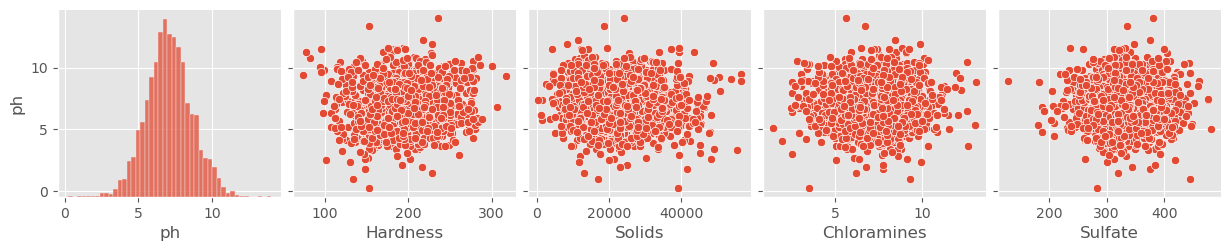

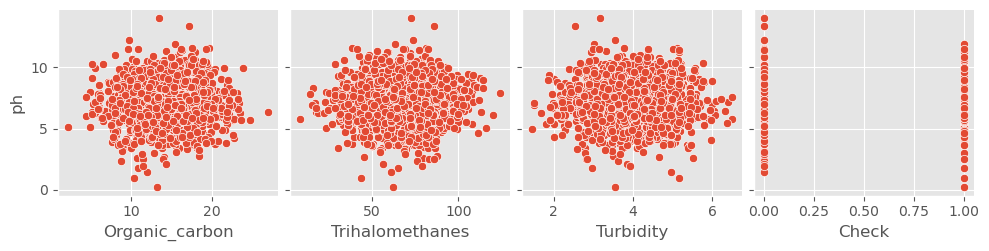

In [48]:
#checking for outliers with scatter plots
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['ph'])

In [49]:
#numerical variables distribution
def histPlot(num):
    sns.histplot(data = data, x = num, bins = 50, kde = True)
    print("{} distribution with hist:".format(num))
    plt.show()

ph distribution with hist:


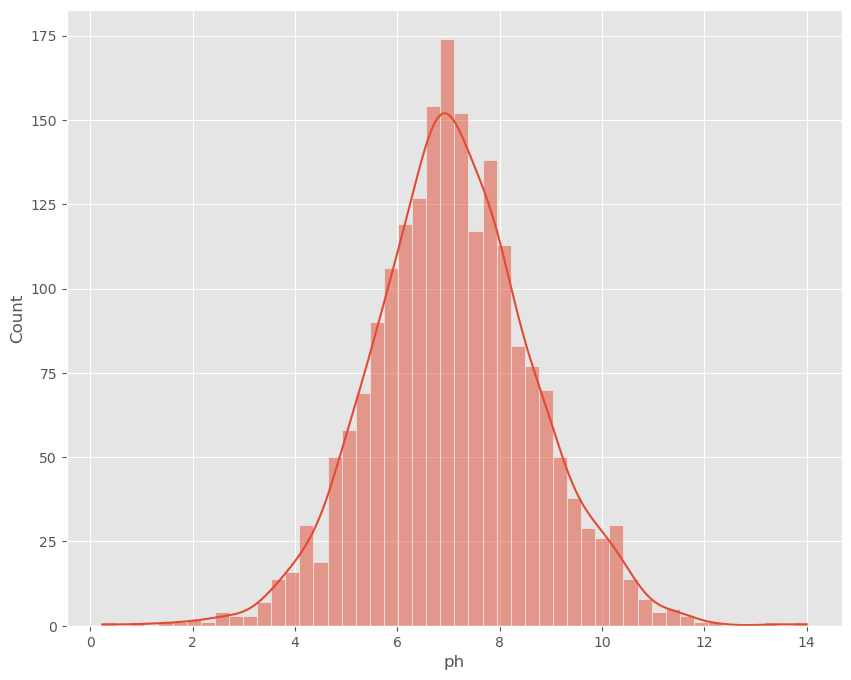

Hardness distribution with hist:


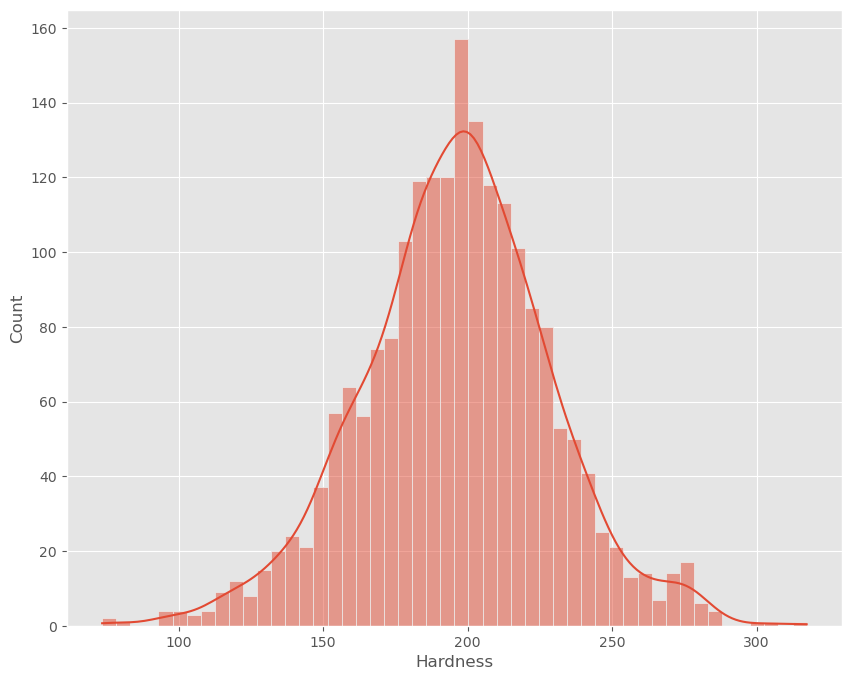

Solids distribution with hist:


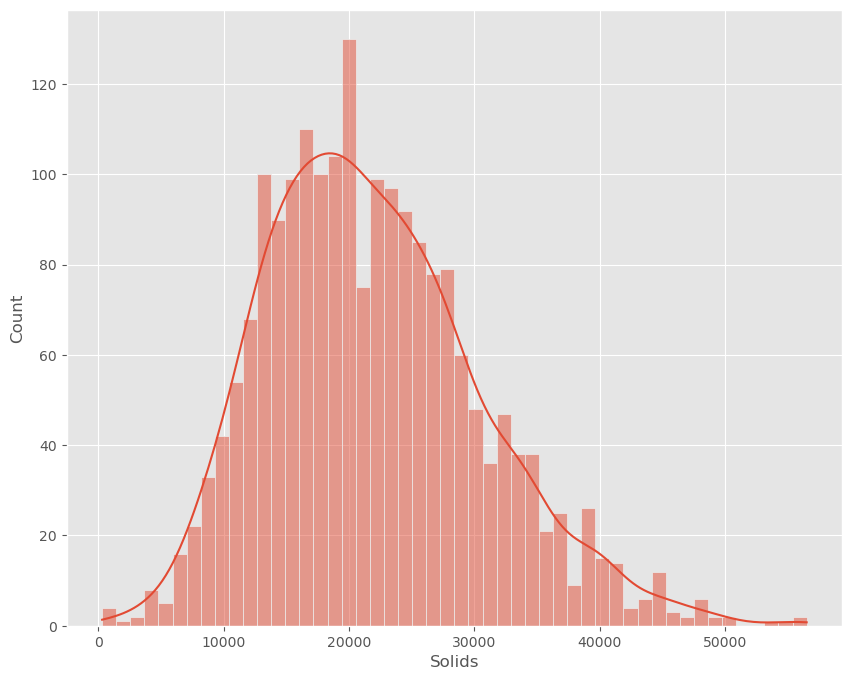

Chloramines distribution with hist:


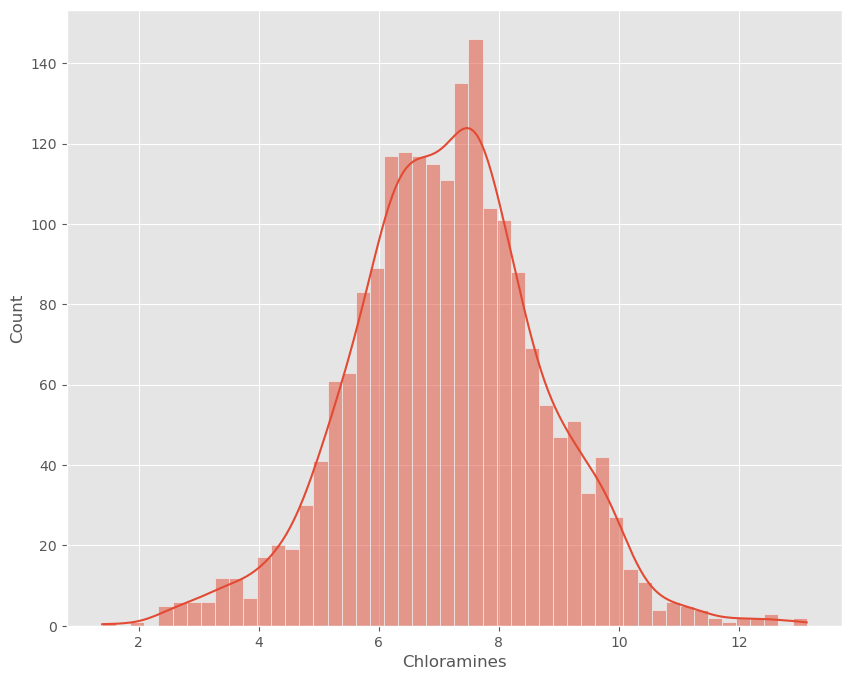

Sulfate distribution with hist:


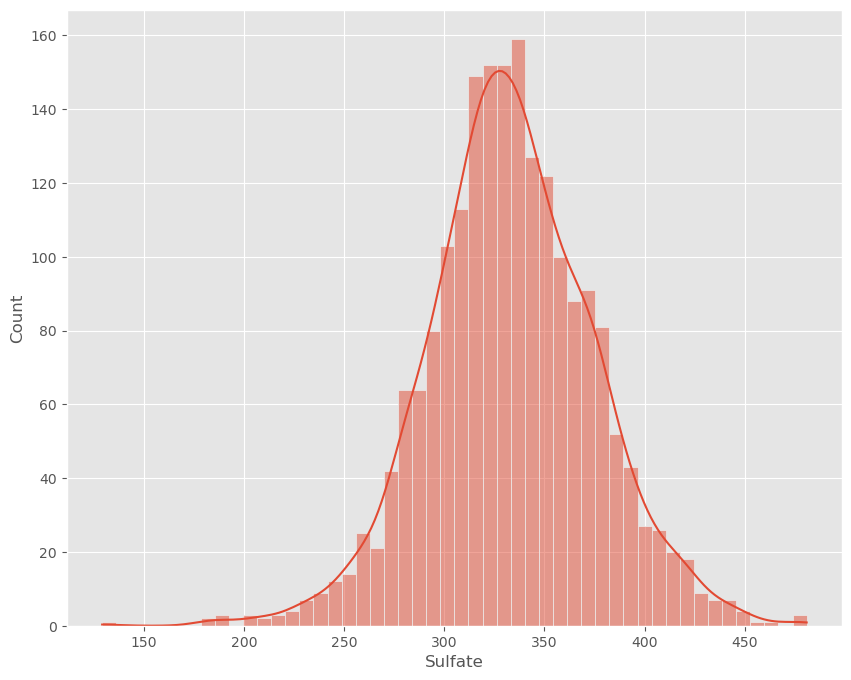

Organic_carbon distribution with hist:


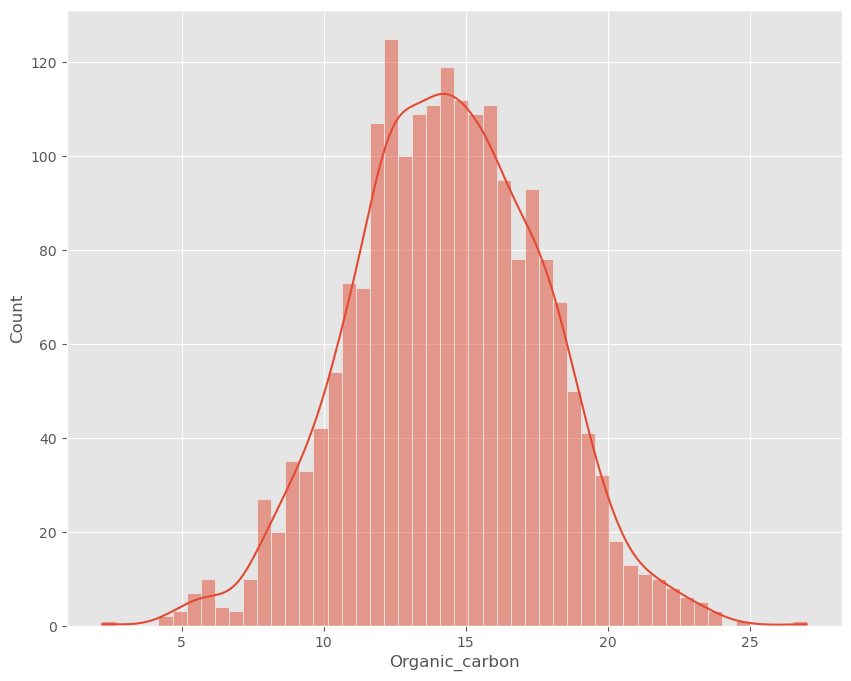

Trihalomethanes distribution with hist:


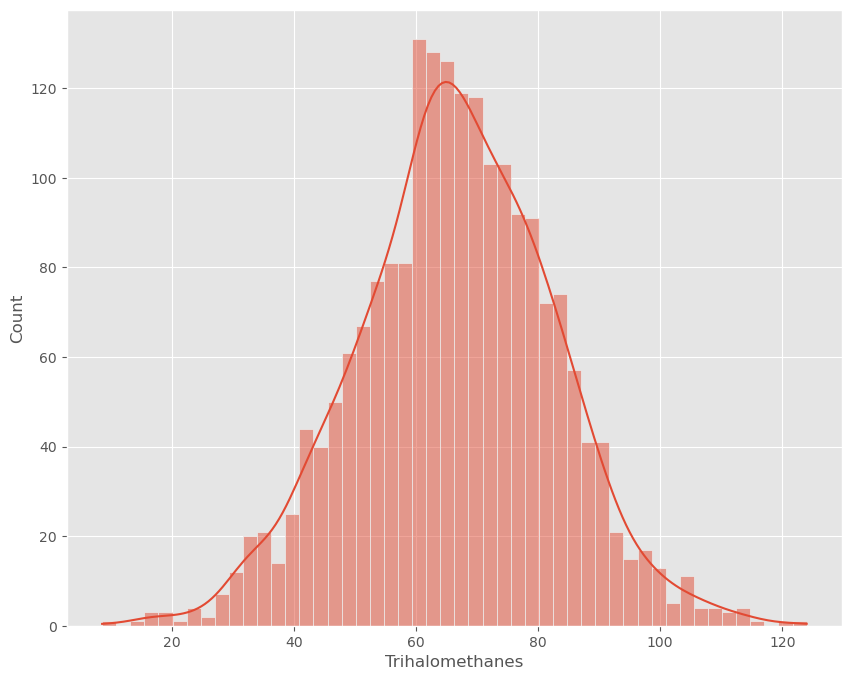

Turbidity distribution with hist:


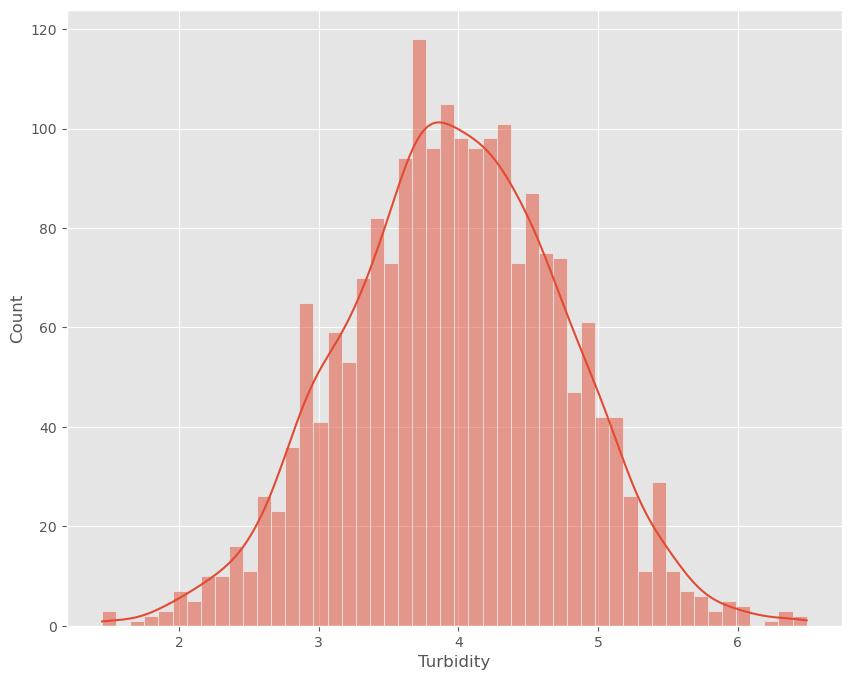

ValueError: Could not interpret value `output` for parameter `x`

In [50]:
for i in num_cols:
    histPlot(i)

In [54]:
scaled_array = scaler.fit_transform(data[num_cols[:-1]])
scaled_array

array([[ 0.7824658 ,  0.56411377,  0.01168692, ...,  1.22703168,
         2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, ..., -0.84215371,
        -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 , ..., -1.79234008,
        -0.7144228 , -1.80736621],
       ...,
       [ 2.8004919 , -3.10036538,  1.76750279, ...,  0.54602107,
        -1.54558489,  0.51212514],
       [-0.64615977, -0.28531709,  0.48857575, ..., -0.6889287 ,
        -0.3721083 , -0.3845623 ],
       [-1.53717226, -0.07007504,  2.9702871 , ..., -0.13937199,
         0.01784567,  0.59743748]])

In [55]:
#collect standardized numeric columns in to a dataframe
data_dummy =pd.DataFrame(scaled_array, columns = num_cols[:-1])
data_dummy.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity
0,0.782466,0.564114,0.011687,0.583804,0.574378,1.227032,2.111652,0.844761
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.842154,-2.140399,0.135033
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.792340,-0.714423,-1.807366
3,1.994902,1.596951,0.790764,0.239248,1.467140,-0.170876,1.132494,-1.662163
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,-0.599824,-0.224135,0.553348


In [57]:
#train & test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))


NameError: name 'x' is not defined

In [53]:
#standardization
scaler = StandardScaler()
scaler

StandardScaler()